<a href="https://colab.research.google.com/github/Jakhongir0103/ML-DL_basic_projects/blob/main/Semantic_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Semantic Segmentation

In [5]:
import fastai
import torch
import numpy as np
from fastai.vision.all import *

In [18]:
path = untar_data(URLs.CAMVID_TINY)

def label_getter(file):
  return path/'labels'/f'{file.stem}_P.png'

# data loaders
dls = SegmentationDataLoaders.from_label_func(path, bs=8, fnames=get_image_files(path/'images'),
                              label_func=label_getter,
                              codes=np.loadtxt(path/'codes.txt', dtype=str))

# fine-tuning
learn = unet_learner(dls, resnet34)
learn.fine_tune(12)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,time
0,3.068392,2.278947,00:08


epoch,train_loss,valid_loss,time
0,1.723357,1.542229,00:01
1,1.512924,1.207392,00:01
2,1.366278,1.034250,00:01
3,1.291316,1.237719,00:01
4,1.231842,0.952008,00:01
5,1.129238,0.845857,00:01
6,1.029488,0.771918,00:01
7,0.944204,0.738804,00:01
8,0.871232,0.712148,00:01
9,0.810466,0.709227,00:01


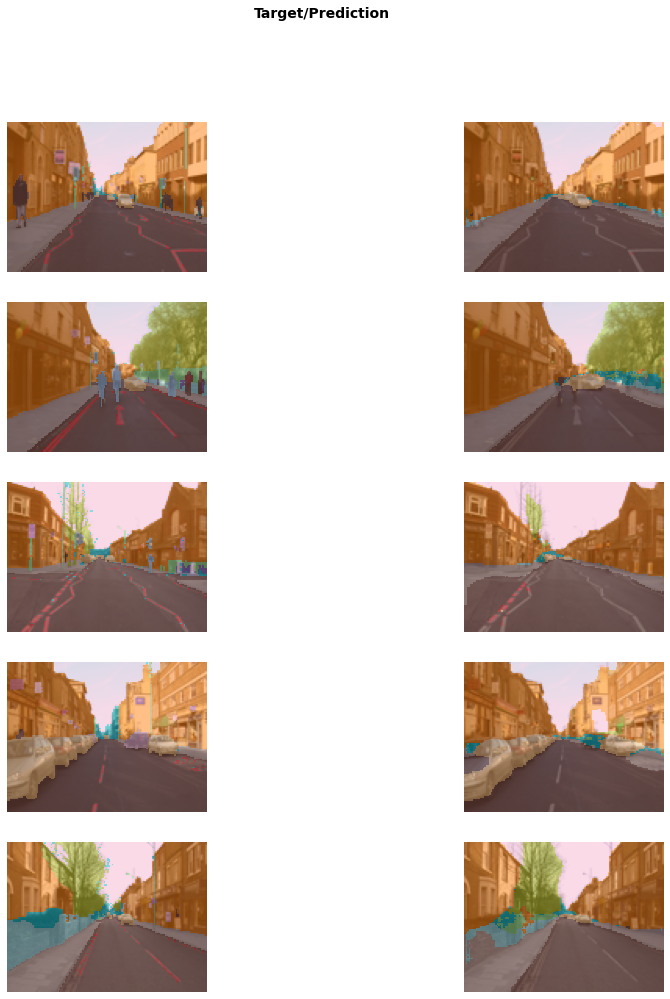

In [19]:
learn.show_results(max_n=5, figsize=(15,16))